In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
#read csv file
data = pd.read_csv("fraud_data.csv")
df=pd.DataFrame(data)

In [5]:
data.head(10)

,ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,2,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,3,40,CASH_OUT,94684.22,C999271610,0.00,0.00,C269348569,100443.55,195127.77,0
3,4,139,CASH_OUT,61572.27,C2098314951,416524.00,354951.73,C1093723175,126019.53,187591.80,0
4,5,526,TRANSFER,682901.78,C50452950,0.00,0.00,C2102114319,748928.26,1431830.04,0
5,6,187,TRANSFER,142740.15,C1405714095,0.00,0.00,C1378055562,246634.60,389374.75,0
6,7,398,TRANSFER,4309298.47,C668700925,4309298.47,0.00,C1360905880,0.00,0.00,1
7,8,306,CASH_IN,147790.37,C128950954,499682.00,647472.37,C1911802090,3564911.28,3417120.91,0
8,9,204,CASH_OUT,170956.09,C1917381506,0.00,0.00,C538563383,1038699.65,1209655.74,0
9,10,163,CASH_OUT,28810.69,C204552268,49544.00,20733.31,C406232323,73381.08,102191.77,0


In [6]:
#checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 11 columns):
ID                18213 non-null int64
step              18213 non-null int64
type              18213 non-null object
amount            18213 non-null float64
nameOrig          18213 non-null object
oldbalanceOrg     18213 non-null float64
newbalanceOrig    18213 non-null float64
nameDest          18213 non-null object
oldbalanceDest    18213 non-null float64
newbalanceDest    18213 non-null float64
isFraud           18213 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [7]:
#checking null values

df.isnull().sum()

ID                0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
#value counts of "IsFraud" column
df['isFraud'].value_counts()

0    10000
1     8213
Name: isFraud, dtype: int64

In [9]:
#value counts of "type" column
df['type'].value_counts()

CASH_OUT    7710
TRANSFER    4902
PAYMENT     3368
CASH_IN     2170
DEBIT         63
Name: type, dtype: int64

In [15]:
# Group by "TransactionType" and calculate the mean of "isFraud"
fraud_percentage_by_type = df.groupby('type')['isFraud'].mean() * 100


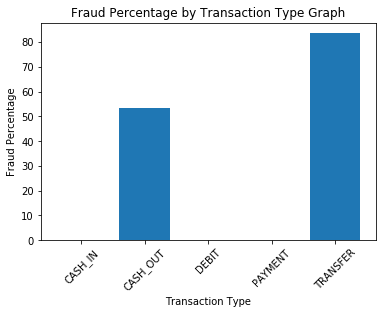

In [17]:
# Create a bar plot
plt.bar(fraud_percentage_by_type.index, fraud_percentage_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Percentage')
plt.title('Fraud Percentage by Transaction Type Graph')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [18]:
#Removing entries in which there is no fraud

data = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
print('The new data now has ', len(data), ' transactions.')  

The new data now has  12612  transactions.


In [20]:
#Number of transactions where the transaction amount is negative
print('Number of transactions where the transaction amount is negative: ' + str(sum(data['amount'] < 0)))

Number of transactions where the transaction amount is negative: 0


In [21]:
#Number of transactions where the transaction amount is equal to zero

print('Number of transactions where the transaction amount is equal to zero: ' +
str(sum(data['amount'] == 0)))

Number of transactions where the transaction amount is equal to zero: 16


Percentage of transactions where originators initial balance is 0: 16.60


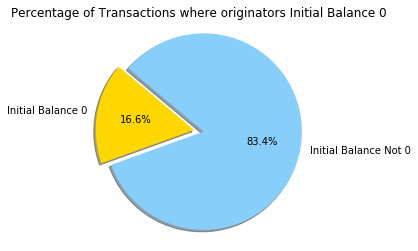

In [22]:
#Percentage of transactions where originators initial balance is 0

no_Ofzero=sum(data['oldbalanceOrg']==0)
total=len(data['oldbalanceDest'])
percentage=(no_Ofzero/total)*100
print(f"Percentage of transactions where originators initial balance is 0: {percentage:.2f}")

labels = ['Initial Balance 0', 'Initial Balance Not 0']
sizes = [percentage, 100 - percentage]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Transactions where originators Initial Balance 0")
plt.show()

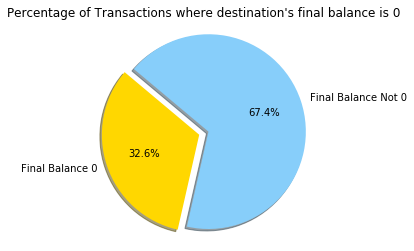

In [23]:
#percentage of transactions where destination's final balance is 0
no_Ofzero=sum(data['newbalanceDest']==0)
total=len(data['newbalanceDest'])
percentage=(no_Ofzero/total)*100

#pie plot
import matplotlib.pyplot as plt
labels = ['Final Balance 0', 'Final Balance Not 0']
sizes = [percentage, 100 - percentage]  # Corrected calculation
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title("Percentage of Transactions where destination's final balance is 0")

# Display the plot
plt.show()

8213
41
% of fraudulent transactions where initial balance of originator is 0: 0.499209


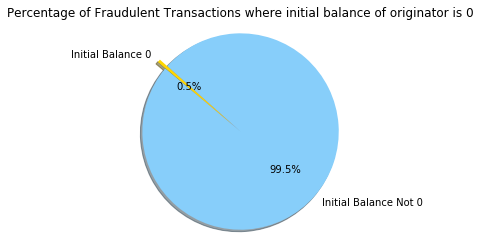

In [26]:
#Percentage of Fraudulent Transactions where initial balance of originator is 0
#for fraudulant data

fraud_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==1 :
    fraud_count=fraud_count+1
print(fraud_count)

value_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==1 and data['oldbalanceOrg'].values[i]==0 :
    value_count=value_count+1
print(value_count)


percentage=(value_count/fraud_count)*100
print(f"% of fraudulent transactions where initial balance of originator is 0: {percentage:2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()

4399
2053
% of non fraudulent transactions where initial balance of originator is 0: 46.669698


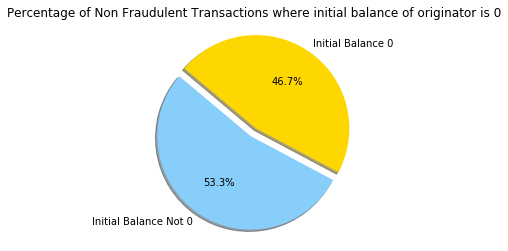

In [31]:
#for non fraudulant data

fraud_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==0 :
    fraud_count=fraud_count+1
print(fraud_count)

value_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==0 and data['oldbalanceOrg'].values[i]==0 :
    value_count=value_count+1
print(value_count)


percentage=(value_count/fraud_count)*100
print(f"% of non fraudulent transactions where initial balance of originator is 0: {percentage:2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.001f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Non Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()     

In [32]:
#Drop 'nameOrig', 'nameDest','isFraud','step' columns
data1 = data.drop(['nameOrig', 'nameDest','isFraud','step'], axis=1)
print(data1.head())
len(data1)

   ID      type       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   1  TRANSFER    321307.31      321307.31            0.00            0.00   
1   2  TRANSFER  10000000.00    27670038.08     17670038.08            0.00   
2   3  CASH_OUT     94684.22           0.00            0.00       100443.55   
3   4  CASH_OUT     61572.27      416524.00       354951.73       126019.53   
4   5  TRANSFER    682901.78           0.00            0.00       748928.26   

   newbalanceDest  
0            0.00  
1            0.00  
2       195127.77  
3       187591.80  
4      1431830.04  


12612

In [33]:
#Test train spliting precess

from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.3,random_state=21)
print("len of train data",len(train_data))
print("len of test data",len(test_data))

len of train data 8828
len of test data 3784


In [34]:
#Test train spliting precess

from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.3,random_state=21)
print("len of train data",len(train_data))
print("len of test data",len(test_data))

len of train data 8828
len of test data 3784


In [ ]:
#training data
x_train=train_data.drop(["isFraud"],axis=1)
y_train=train_data["isFraud"]

#testing data
x_test=test_data.drop("isFraud",axis=1)
y_test=test_data["isFraud"]
print(type(y_train))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#numerical features
num_feats=x_train.drop("type",axis=1)
num_feats_pipe=Pipeline([
    ("scalar",MinMaxScaler())
    ])
num_feats_preprocessed=num_feats_pipe.fit_transform(num_feats)

#catagorical features
cat_feats=x_train[["type"]]
cat_feats_pipe=Pipeline([
    ("encoder",OneHotEncoder())
    ])
cat_feats_preprocessed=cat_feats_pipe.fit_transform(cat_feats)
print(num_feats)

In [ ]:
from sklearn.compose import ColumnTransformer
num_list=list(num_feats)
cat_list=list(cat_feats)

final_pipeline=ColumnTransformer([
    ("num",num_feats_pipe,num_list),
    ("cat",cat_feats_pipe,cat_list)])
X_train_preprocessed=final_pipeline.fit_transform(x_train)
print(x_train)
X_train_preprocessed

X_test_preprocessed = final_pipeline.fit_transform(x_test)
X_test_preprocessed

In [38]:
#logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()    

In [ ]:
log_model=model.fit(X_train_preprocessed,y_train)

In [ ]:
y_train_pred = log_model.predict(X_train_preprocessed)
y_train_pred

In [ ]:
y_test_pred=log_model.predict(X_test_preprocessed)
y_test_pred

In [ ]:
#Train Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()

In [ ]:
#Test Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()

In [ ]:
#F1 score of train and test

from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred)
print("F1 Score of test data:", f2)

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)

# Train the model on your training data
rf_model.fit(X_train_preprocessed,y_train)

# Make predictions on your testing data
y_test_pred_rf = rf_model.predict(X_test_preprocessed)

In [ ]:
# Make predictions on training data
y_train_pred_rf = rf_model.predict(X_train_preprocessed)
y_train_pred_rf
y_test_pred_rf

In [ ]:
#F1 score of train and test
from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred_rf)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_rf)
print("F1 Score of test data:", f2)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred_rf)
print(report)